# Importando Bibliotecas Necessárias e definindo o diretório base

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

base_dir = '/content/drive/MyDrive/3°  Período/Sistemas Inteligentes/Desafio4/data'

Mounted at /content/drive


# *Coletando Imagens do Tom e Jerry para Classificação*

## Objetivo do Modelo :
### O objetivo deste modelo é classificar se a imagem contém o Tom ou o Jerry.

## Carregamento e Tratamento das Imagens
### As imagens serão carregadas a partir do diretório base. Elas serão divididas em conjuntos de treinamento e validação. Além disso, todas as imagens serão redimensionadas para 180x180 pixels e será definido o tamanho do batch.

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size = 32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size= 32
)

# Verifique as classes
class_names = train_ds.class_names
print(class_names)

Found 3175 files belonging to 2 classes.
Using 2540 files for training.
Found 3175 files belonging to 2 classes.
Using 635 files for validation.
['jerry', 'tom']


## Exibindo algumas imagens do conjunto de treinamento


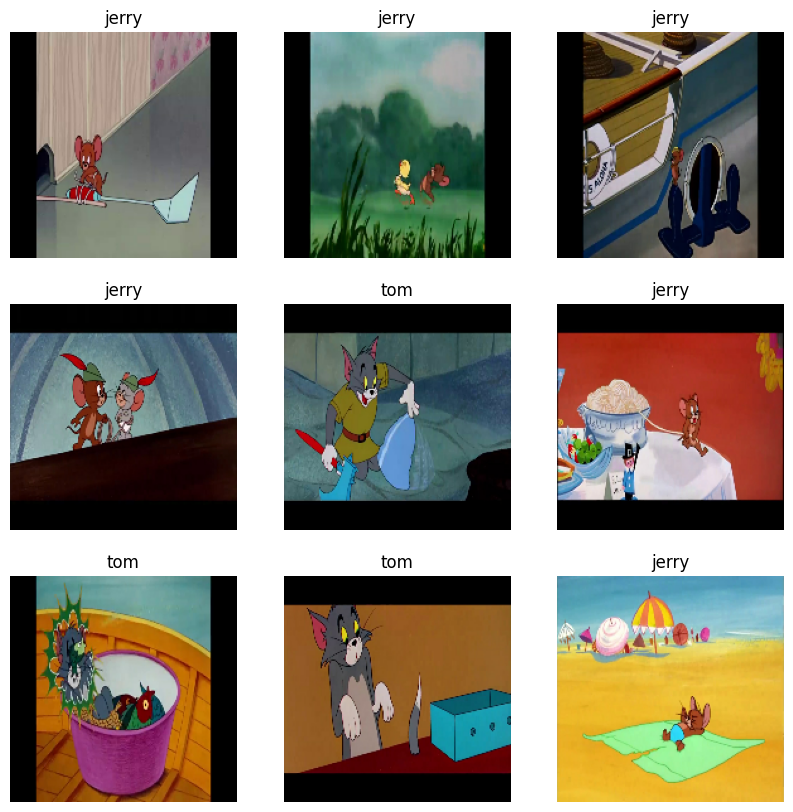

In [ ]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

### Extrai as imagens e labels dos datasets train e valid e converte-os em arrays numpy e verifica as formas do arrays.

In [ ]:
import numpy as np

# Extrair imagens e labels do dataset
X_train = []
y_train = []


for images, labels in train_ds:
    X_train.append(images.numpy())
    y_train.append(labels.numpy())

# Converter listas para arrays numpy
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

X_valid = []
y_valid = []

for images, labels in val_ds:
    X_valid.append(images.numpy())
    y_valid.append(labels.numpy())

X_valid = np.concatenate(X_valid, axis=0)
y_valid = np.concatenate(y_valid, axis=0)


print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2540, 180, 180, 3)
(2540,)
(635, 180, 180, 3)
(635,)


###  Verificar os valores máximos e mínimos dos arrays de imagens

In [ ]:
X_train.max(), X_train.min(), X_valid.max(), X_valid.min()

(255.0, 0.0, 255.0, 0.0)

### Normalize as imagens dividindo os valores dos pixels por 255 e transforma os labels categóricos em numéricos usando a função to_categorical do Keras.

In [ ]:
# Normalização
X_train = X_train / 255.0
y_traing = y_train / 255.0
X_train = X_train / 255
X_valid = X_valid / 255


#Transformando os variaveis categoricas em numericas
num_classes = 2
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes)

# *Crie um modelo de Rede Neural Artificial (ANN) usando a API Sequential do Keras.*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Flatten(input_shape=(180, 180, 3)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Resume a arquitetura do modelo.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 97200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      49,766,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,030,594 (190.85 MB)

 Trainable params: 50,030,594 (190.85 MB)

 Non-trainable params: 0 (0.00 B)

### Compila e treina o modelo

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history_ANN = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5993 - loss: 0.6821 - val_accuracy: 0.6630 - val_loss: 1.3439
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.7247 - loss: 0.5765 - val_accuracy: 0.6520 - val_loss: 3.2133
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7332 - loss: 0.5422 - val_accuracy: 0.7197 - val_loss: 1.7761
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7944 - loss: 0.4562 - val_accuracy: 0.7717 - val_loss: 2.1531
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.8234 - loss: 0.4017 - val_accuracy: 0.7622 - val_loss: 1.6827
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8206 - loss: 0.4089 - val_accuracy: 0.7764 - val_loss: 2.1909
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.8607 - loss: 0.3226 - val_accuracy: 0.7890 - val_loss: 2.4750
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8683 - loss: 0.3208 - val_accuracy: 0.7433 - val_

# *Cria um modelo de Rede Neural Convolucional (CNN) usando a API Sequential do Keras.*

In [ ]:
#Create CNN model

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Resume a arquitetura do modelo CNN.




In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,234 (25.36 MB)

 Trainable params: 6,647,234 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compila e treina o modelo CNN

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)



history_CNN = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.8021 - loss: 0.4471 - val_accuracy: 0.8535 - val_loss: 0.3310
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.8757 - loss: 0.3148 - val_accuracy: 0.8535 - val_loss: 0.2941
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9323 - loss: 0.1738 - val_accuracy: 0.9354 - val_loss: 0.1881
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9680 - loss: 0.0949 - val_accuracy: 0.9591 - val_loss: 0.1144
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.9859 - loss: 0.0531 - val_accuracy: 0.9559 - val_loss: 0.1082
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.9947 - loss: 0.0223 - val_accuracy: 0.9480 - val_loss: 0.1597
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9957 - loss: 0.0165 - val_accuracy: 0.9480 - val_loss: 0.2081
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.9822 - loss: 0.0506 - val_accuracy: 0.9449 - v

# *Comparação das Métricas de Treinamento: CNN vs ANN*

## A CNN demonstra superioridade na classificação de imagens, evidenciada por valor de acurácia maior e por um valor da loss de validação significativamente menor em comparação com a ANN, indicando um menor overfitting.



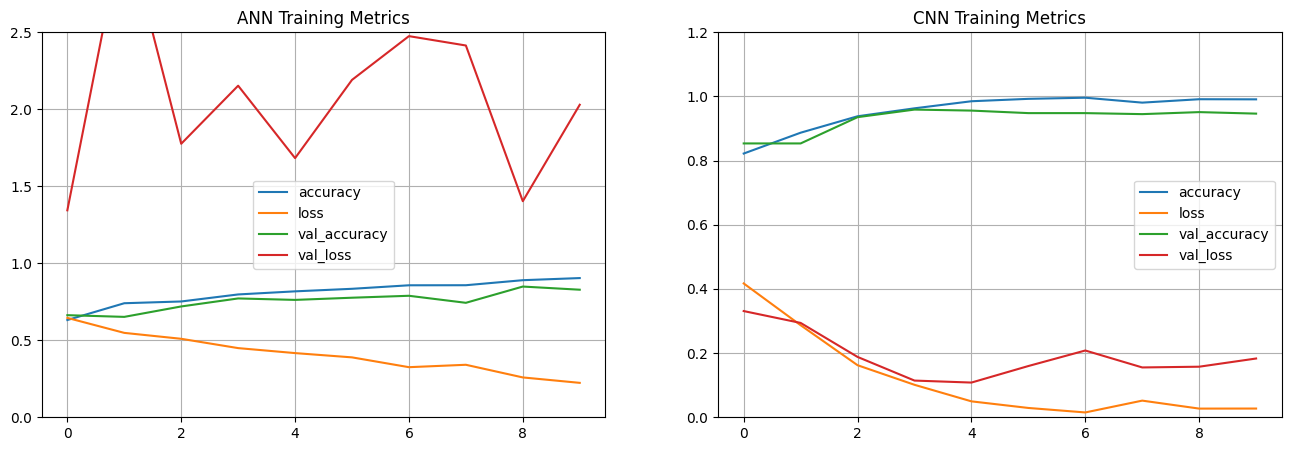

In [ ]:
import pandas as pd

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico da ANN no primeiro subplot
pd.DataFrame(history_ANN.history).plot(ax=axes[0])
axes[0].grid(True)
axes[0].set_ylim(0, 2.5)
axes[0].set_title('ANN Training Metrics')

# Gráfico da CNN no segundo subplot
pd.DataFrame(history_CNN.history).plot(ax=axes[1])
axes[1].grid(True)
axes[1].set_ylim(0, 1.2)
axes[1].set_title('CNN Training Metrics')

plt.show()